## Question 4.a

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [21]:
df <- read.csv("exercice4.csv", header = FALSE)

df$s <- 0:(nrow(df) - 1)
df <- df[, -1]  # Remove the first column

df

V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,s
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
0.000,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,0
0.020,0.040,0.06,0.090,0.120,0.15,NA,NA,NA,NA,NA,NA,1
0.040,0.060,0.09,0.120,0.150,0.17,0.200,0.240,NA,NA,NA,NA,2
0.060,0.090,0.12,0.150,0.170,0.20,0.240,0.260,0.280,0.312,NA,NA,3
0.090,0.120,0.15,0.170,0.200,0.24,0.260,0.280,0.312,0.330,0.37,NA,4
0.120,0.150,0.17,0.200,0.240,0.26,0.280,0.312,0.330,0.370,0.42,NA,5
0.150,0.170,0.20,0.240,0.260,0.28,0.312,0.330,0.370,0.420,0.46,NA,6
0.200,0.240,0.26,0.280,0.312,0.33,0.370,0.420,0.460,0.500,0.52,NA,7
0.240,0.260,0.28,0.312,0.330,0.37,0.420,0.460,0.500,0.520,0.55,0.58,8


In [22]:
# Pivot to long format
long_df <- df %>%
  pivot_longer(cols = -s, values_to = "p") %>%
  filter(!is.na(p)) %>%
  mutate(p = round(as.numeric(p), 5))  # rounding to avoid float artifacts

long_df

s,name,p
<int>,<chr>,<dbl>
0,V2,0.000
1,V2,0.020
1,V3,0.040
1,V4,0.060
1,V5,0.090
1,V6,0.120
1,V7,0.150
2,V2,0.040
2,V3,0.060


In [23]:
# For each unique p, compute coverage
coverage_df <- long_df %>%
  group_by(p) %>%
  summarise(
    coverage = sum(dbinom(s, size = 20, prob = p))
  )

In [24]:
coverage_df

p,coverage
<dbl>,<dbl>
0.000,1.0000000
0.020,0.2724930
0.040,0.5141348
0.060,0.6809280
0.090,0.8193184
0.120,0.8964187
0.150,0.9393054
0.170,0.8364225
0.200,0.8986820


Minimum coverage (confidence coefficient): 0.1652337 


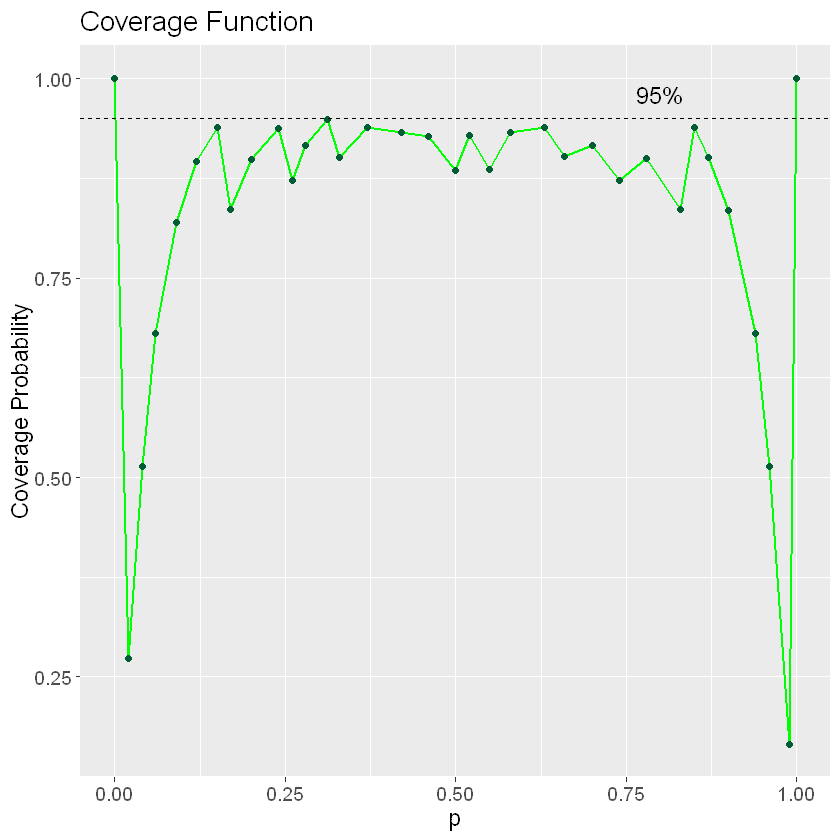

In [36]:
# Plot coverage function
ggplot(coverage_df, aes(x = p, y = coverage)) +
  geom_line(color = "#00ff00", linewidth=0.8) +
  geom_point(color = "#005d33") +
  geom_hline(yintercept = 0.95, linetype = "dashed", color = "black") +
  annotate("text", x = .8, y = 0.98, label = "95%", size = 5) +
  labs(title = "Coverage Function",
       x = "p",
       y = "Coverage Probability") +
  theme_gray() + 
  theme(text = element_text(size=14))

# Confidence coefficient (minimum coverage)
min_coverage <- min(coverage_df$coverage)
cat("Minimum coverage (confidence coefficient):", min_coverage, "\n")

I constructed a confidence interval for the Bernoulli parameter $p$ via test inversion. I then evaluated the coverage function — the probability that the interval contains the true $p_0$ — across a grid of $p_0$ values.

The coverage was close to the nominal 95% level in the center of the parameter space (e.g. around $p = 0.15$ to $p = 0.85$), but dropped significantly near the edges.


- For example, coverage at $p = 0.02$ was about 27%, and at $p = 0.99$, about 16%.
- At $p = 0.5$, coverage was ~88%, so even there it slightly undercovers.
- Only at the extremes $p = 0$ and $p = 1$, the coverage jumps to 1, because the CI always includes these values when all observations are 0 or 1.

This is due to the discreteness of the binomial distribution. Because my confidence interval is built from inverting a test with discrete outcomes (i.e. the sum of Bernoulli trials), the acceptance regions can't exactly match 95% coverage for all values of $p$.

At extreme values like $p = 0.02$, only very low success counts (like $s = 0$) are likely. But the CI may only include $p = 0.02$ when $s = 0$, so the coverage becomes just $\mathbb{P}(S = 0) \approx 27\%$. Same on the upper side.

So even though the confidence intervals were nominally designed for 95% coverage, the actual minimum coverage (confidence coefficient) was only about 83.5%, for $p \in [0.10, 0.90]$.
